In [1]:
import pandas as pd
import scipy.stats as stats
import spacy
import numpy as np
from spacy.en import English
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
twee = pd.read_csv('Tweets.csv')
list(twee.columns.values)

['tweet_id',
 'airline_sentiment',
 'airline_sentiment_confidence',
 'negativereason',
 'negativereason_confidence',
 'airline',
 'airline_sentiment_gold',
 'name',
 'negativereason_gold',
 'retweet_count',
 'text',
 'tweet_coord',
 'tweet_created',
 'tweet_location',
 'user_timezone']

In [3]:
twee.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
twee = twee.drop(['airline_sentiment_gold','negativereason_gold','tweet_coord','tweet_location'], 1)

In [5]:
twee.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,Pacific Time (US & Canada)


In [6]:
count_sentiment = twee['airline_sentiment'].value_counts()
number_of_tweets = twee['tweet_id'].count()
print(count_sentiment)

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64


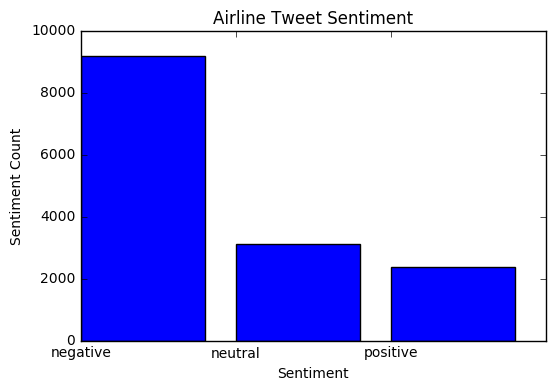

In [7]:
Index = [1,2,3]
plt.bar(Index,count_sentiment)
plt.xticks(Index,['negative','neutral','positive'])
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title('Airline Tweet Sentiment')

In [8]:
mean_zones = twee.groupby(['user_timezone','airline_sentiment']).count().sort_index()
mean_zones.head()

tweet_id  airline_sentiment_confidence  \
user_timezone airline_sentiment                                           
Abu Dhabi     neutral                  13                            13   
              positive                 10                            10   
Adelaide      negative                  2                             2   
              neutral                   3                             3   
              positive                  2                             2   

                                 negativereason  negativereason_confidence  \
user_timezone airline_sentiment                                              
Abu Dhabi     neutral                         0                          2   
              positive                        0                          0   
Adelaide      negative                        2                          2   
              neutral                         0                          0   
              positive                        0                          0   

                                 airline  name  retweet_count  text  \
user_timezone airline_sentiment                                       
Abu Dhabi     neutral                 13    13             13    13   
              positive                10    10             10    10   
Adelaide      negative                 2     2              2     2   
              neutral                  3     3              3     3   
              positive                 2     2              2     2   

                                 tweet_created  
user_timezone airline_sentiment                 
Abu Dhabi     neutral                       13  
              positive                      10  
Adelaide      negative                       2  
              neutral                        3  
              positive                       2

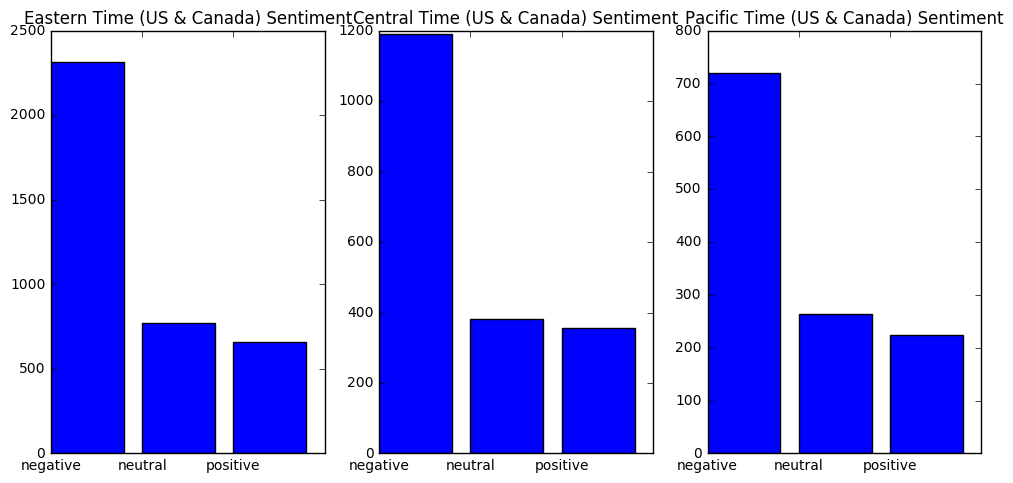

In [9]:
def by_timezone(timezone):
    blob = twee[twee['user_timezone']==timezone]
    count_sentiments = blob['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count_sentiments)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.title(timezone + ' Sentiment')
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
by_timezone('Eastern Time (US & Canada)')
plt.subplot(232)
by_timezone('Central Time (US & Canada)')
plt.subplot(233)
by_timezone('Pacific Time (US & Canada)')
plt.subplot(233)

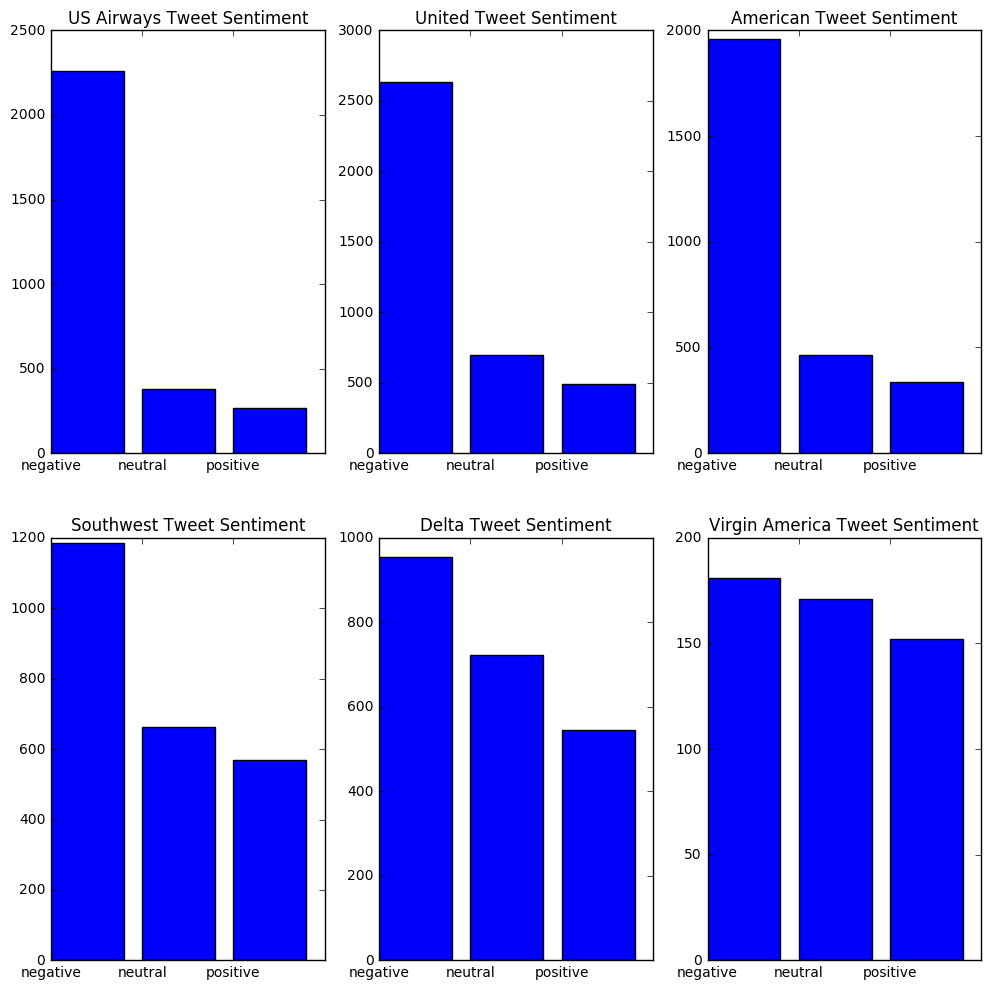

In [10]:
def by_airline(airline):
    blob = twee[twee['airline']==airline]
    count_sentiments = blob['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count_sentiments)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.title(airline + ' Tweet Sentiment')
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
by_airline('US Airways')
plt.subplot(232)
by_airline('United')
plt.subplot(233)
by_airline('American')
plt.subplot(234)
by_airline('Southwest')
plt.subplot(235)
by_airline('Delta')
plt.subplot(236)
by_airline('Virgin America')

In [11]:
airlines_tweet = twee.groupby(['airline']).airline_sentiment.value_counts()
airlines_tweet

airline         airline_sentiment
American        negative             1960
                neutral               463
                positive              336
Delta           negative              955
                neutral               723
                positive              544
Southwest       negative             1186
                neutral               664
                positive              570
US Airways      negative             2263
                neutral               381
                positive              269
United          negative             2633
                neutral               697
                positive              492
Virgin America  negative              181
                neutral               171
                positive              152
Name: airline_sentiment, dtype: int64

In [12]:
twee.negativereason.value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

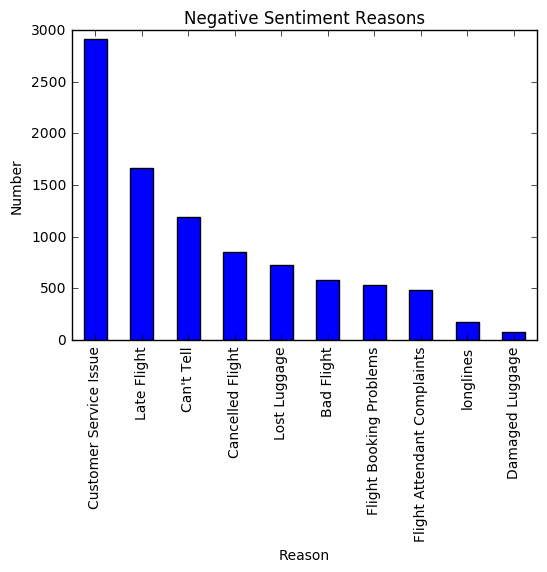

In [13]:
pd.Series(twee['negativereason']).value_counts().plot(kind = 'bar',title = 'Negative Sentiment Reasons')
plt.xlabel('Reason')
plt.ylabel('Number')

In [14]:
xtab_percent = pd.crosstab(twee['airline'], twee['airline_sentiment']).apply(lambda r: r/r.sum(), axis=1)
xtab_percent

airline_sentiment,negative,neutral,positive
airline,,,
American,0.710402,0.167814,0.121783
Delta,0.429793,0.325383,0.244824
Southwest,0.490083,0.274380,0.235537
US Airways,0.776862,0.130793,0.092345
United,0.688906,0.182365,0.128728
Virgin America,0.359127,0.339286,0.301587


In [15]:
nlp = spacy.load('en')
nlp_toolkit = English()
nlp_toolkit

In [16]:
def extract_words(originaltweet):
    letter = re.sub("[^a-zA-Z]", "", originaltweet)
    words = [w for w in words if not w in stops] 
    return(words)
    print(words)

def the_words(words):
    extract_words
    return( "".join(words)) 

def tweet_length(words):
    extract_words
    return(len(words))

twee['scrubbed_tweet']=twee['text'].apply(lambda x: the_words(x))
twee['length']=twee['text'].apply(lambda x: tweet_length(x))
train,test = train_test_split(twee,test_size=0.33,random_state=42)

twee['sentiment']=twee['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [17]:
train_scrubbed_tweet=[]
for tweet in train['scrubbed_tweet']:
    train_scrubbed_tweet.append(tweet)
test_scrubbed_tweet=[]
for tweet in test['scrubbed_tweet']:
    test_scrubbed_tweet.append(tweet)
        
print(test_scrubbed_tweet)

["@SouthwestAir you're my early frontrunner for best airline! #oscars2016", '@USAirways how is it that my flt to EWR was Cancelled Flightled yet flts to NYC from USAirways are still flying?', '@JetBlue what is going on with your BDL to DCA flights yesterday and today?! Why is every single one getting delayed?', '@JetBlue do they have to depart from Washington, D.C.??', '@JetBlue I can probably find some of them. Are the ticket #s on there?', '@united still waiting to hear back. My wallet was stolen from one of your planes so would appreciate a resolution here', "@united Yes my flight was rebooked. I'm just losing trust in you if I want to get anywhere on time.", '@JetBlue Thank you ! What about Paris ? Could we arrange something from there ?', '@united not 100% sure, however my ticket included one checked bag, therefore this charge was extra and completely unanticipated.', '@usairways great crew for flight 504 PHX to YVR tonight! Friendly, efficient. Awesome job.', "@USAirways I've bee

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_scrubbed_tweet)
test_features=v.transform(test_scrubbed_tweet)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [ ]:
Classifiers = [
    LogisticRegression(C=0.000000001),
    KNeighborsClassifier(),
    SVC(C=0.05, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB()]

In [ ]:
twee_features=train_features.toarray()
twee_test=test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['airline_sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(twee_features,train['airline_sentiment'])
        pred = fit.predict(twee_test)
    accuracy = accuracy_score(pred,test['airline_sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print(classifier.__class__.__name__+' | '+str(accuracy))


LogisticRegression | 0.638451986755
KNeighborsClassifier | 0.495447019868
